<a href="https://colab.research.google.com/github/Chirag314/hands-on-machine-learning-/blob/main/housing_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This notebook is made using code from book Hands on Machine Learning using scikit learn and Keras

Dataset from hands on Machine learning - volume3

In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
  tarball_path=Path("datasets/housing.tgz")
  if not tarball_path.is_file():
    Path("datasets").mkdir(parents=True,exist_ok=True)
    url="https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url,tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path="datasets")
  return pd.read_csv(Path("datasets/housing/housing.csv"))

housing=load_housing_data()

In [3]:
# take a look at the data
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# find out categories of housing proximity
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
# lets check other fielsd
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


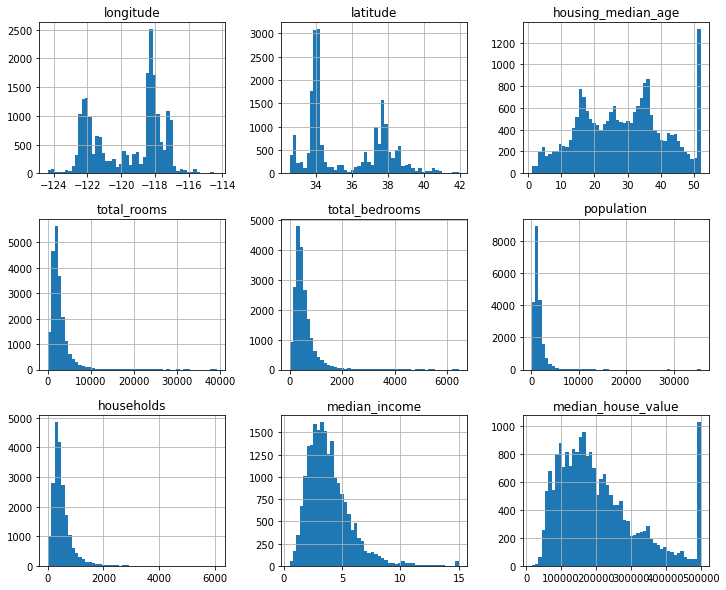

In [7]:
# Another way to look at data is plot histogram of each numerical varaible

import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(12,10))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(housing,test_size=0.2,random_state=42)

In [9]:
# create a new categorical feature from numeric feature median income
import numpy as np
housing['income_cat']=pd.cut(housing['median_income'],bins=[0,1.5,3,4.5,6,np.inf],
                             labels=[1,2,3,4,5])

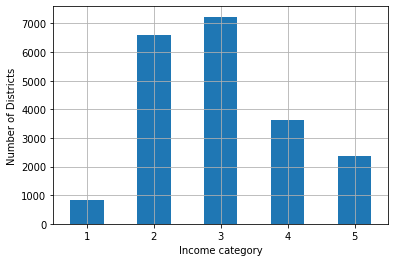

In [10]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of Districts")
plt.show()

In [11]:
# do stratified splitting
strat_train_set, strat_test_set=train_test_split(housing, test_size=0.2,
                                                 stratify=housing['income_cat'],
                                                 random_state=42)

In [12]:
# lets check if this worked or not
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [13]:
# we wont be using incom_cat column again so we should drop it 
for set_ in (strat_train_set,strat_test_set):
  set_.drop('income_cat',axis=1,inplace=True)

## Data exploration
First, make sure you have put the test set aside and you are only exploring the training set. Also, if the training set is very large, you may want to sample an exploration set, to make manipulations easy and fast during the exploration phase. In this case, the training set is quite small, so you can just work directly on the full set. Since you’re going to experiment with various transformations of the full training set, you should make a copy of the original so you can revert to it afterwards:

In [14]:
# make a copy of training dataset
housing=strat_train_set.copy()

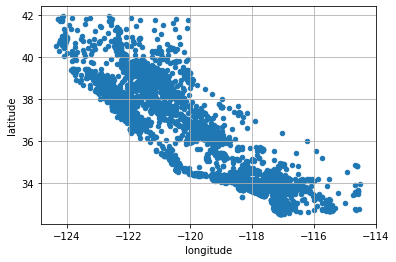

In [15]:
#visualizing geophrical data
housing.plot(kind="scatter",x='longitude',y='latitude',grid=True)
plt.show()

This looks like California all right, but other than that it is hard to see any particular pattern. Setting the alpha option to 0.2 makes it much easier to visualize the places where there is a high density of data points

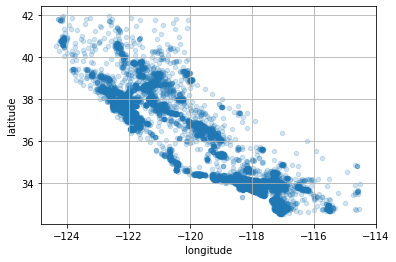

In [16]:
housing.plot(kind='scatter',x='longitude',y='latitude',grid=True,alpha=0.2)
plt.show()

Now that’s much better: you can clearly see the high-density areas, namely the Bay Area and around Los Angeles and San Diego, plus a long line of fairly high-density areas in the Central Valley (in particular, around Sacramento and Fresno).

Our brains are very good at spotting patterns in pictures, but you may need to play around with visualization parameters to make the patterns stand out.

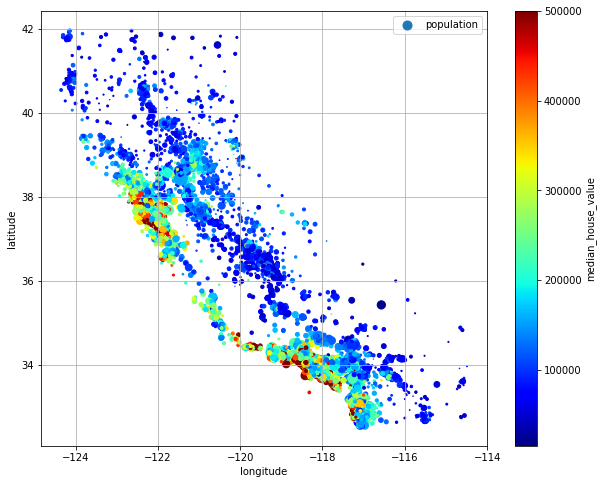

In [17]:
# use colors to disply various range of prices
housing.plot(kind='scatter',x='longitude',y='latitude',grid=True,
             s=housing['population']/100,label='population',
             c='median_house_value',cmap='jet',colorbar=True,
             legend=True,sharex=False,figsize=(10,8))

Since the dataset is not too large, you can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the corr() method:

In [18]:
corr_matrix=housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


In [19]:
# Check how much each attribute correlates with median house price
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

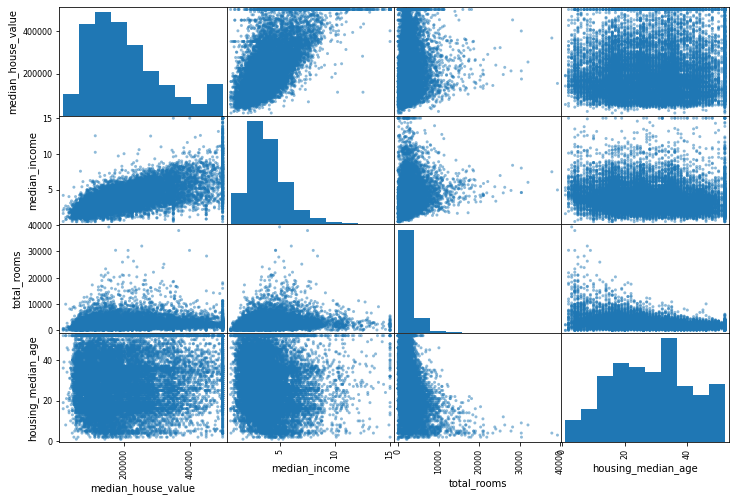

In [21]:
# Another way to check corelation is to use pandas scatter_matrix()
from pandas.plotting import scatter_matrix
attributes=['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

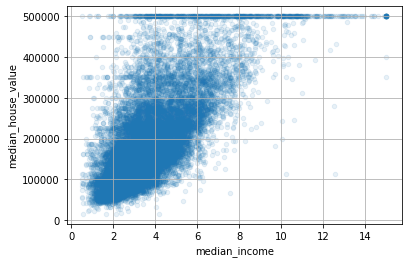

In [22]:
#Looking at the correlation scatterplots, it seems like the most promising attribute to predict 
#the median house value is the median income, so lets zoom in on their scatterplot.

housing.plot(kind='scatter',x='median_income',y="median_house_value",alpha=0.1,grid=True)

In [23]:
# Check co relation between different attributes of features
#the total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms. 
#and the population per household also seems like an interesting attribute combination to look at.

housing["rooms_per_house"]=housing["total_rooms"]/housing["households"]
housing['bedroms_ratio']=housing["total_bedrooms"]/housing["total_rooms"]
housing['people_per_house']=housing["population"]/housing['households']


In [25]:
# Check corelation matrix again
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedroms_ratio        -0.256397
Name: median_house_value, dtype: float64

The new bedrooms_ratio attribute is much more correlated with the median house value than the total number of rooms or bedrooms. Apparently houses with a lower bedroom/room ratio tend to be more expensive. The number of rooms per household is also more informative than the total number of rooms in a district—obviously the larger the houses, the more expensive they are.